## Title:Militant operations of Indian Army


In [1]:
##Exploring Traveler data
import pandas as pd
import matplotlib.pyplot as plt
%pylab inline 
train_file="deaths-in-india-satp-dfe_Final.csv"

data = pd.read_csv(train_file, header = 0,index_col=None)

Populating the interactive namespace from numpy and matplotlib


## Splitting Data into train data and test data

In [2]:
df_train = data.head(22000)

df_test = data.tail(5000)
df_test.drop('verb',axis = 1, inplace = True)

/home/shashwat/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


## Conacatenate train and test data for Preprocessing

In [3]:
data = pd.concat((df_train, df_test), axis=0, ignore_index=True)

/home/shashwat/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  """Entry point for launching an IPython kernel.


## Preprocessing 

In [4]:
#dropping _goden as this attribute contains same value for all of its records
data.drop('_golden', axis = 1, inplace = True)
print("Dropping _golden")

#dropping _unit_state as this attribute contains same value for all of its records
data.drop('_unit_state',axis = 1, inplace = True)
print("Dropping _unit_state")

#dropping _trusted_judgments as this attribute contains same value for all of its records
data.drop('_trusted_judgments',axis = 1, inplace = True)
print("Dropping _trusted_judgments")

#dropping _last_judgment_at as this does not help for our prediction
data.drop('_last_judgment_at',axis = 1, inplace = True)
print("Dropping _last_judgment_at")

#dropping _accuracy as this attribute contains same value for all of its records
data.drop('accuracy',axis = 1, inplace = True)
print("Dropping accuracy")

#dropping canddist as this attribute does not help for our prediction
data.drop('canddist',axis = 1, inplace = True)
print("Dropping canddist")

#dropping civilians_gold as this attribute contains same value for all of its records
data.drop('civilians_gold',axis = 1, inplace = True)
print("Dropping civilians_gold")

#dropping date as this attribute does not help for our prediction
data.drop('date',axis = 1, inplace = True)
print("Dropping date")

#dropping militants_terrorists_insurgents_gold as this attribute  does not contain any value for all of its records
data.drop('militants_terrorists_insurgents_gold',axis = 1, inplace = True)
print("Dropping militants_terrorists_insurgents_gold")

#droppin object as it is a redundant attribute
data.drop('object',axis = 1, inplace = True)
print("Dropping object")

#dropping objectcleanpp as this attribute does nothelp for our prediction
data.drop('objectcleanpp',axis = 1, inplace = True)
print("Dropping objectcleanpp")

#droppin object as it is a redundant attribute
data.drop('objectcount',axis = 1, inplace = True)
print("Dropping objectcount")

#droppin object as does not help for our prediction
data.drop('pid',axis = 1, inplace = True)
print("Dropping pid")

#droppin object as does not help for our prediction
data.drop('rid',axis = 1, inplace = True)
print("Dropping rid")

#dropping security_forces_gold as this attribute does not contain any value for all of its records
data.drop('security_forces_gold',axis = 1, inplace = True)
print("Dropping security_forces_gold")


#dropping objectcleanpp as this attribute does nothelp for our prediction
data.drop('sentence',axis = 1, inplace = True)
print("Dropping sentence")

#dropping sid as this attribute is not helpful possible prediction of future attacks
data.drop('sid',axis = 1, inplace = True)
print("Dropping sid")

#dropping srid as this attribute does not contain any value for all of its records
data.drop('srid',axis = 1, inplace = True)
print("Dropping srid")

#droppin state as it is a redundant attribute
data.drop('state',axis = 1, inplace = True)
print("Dropping state")

#droppin state as it is not helpful possible prediction of future attacks
data.drop('subject',axis = 1, inplace = True)
print("Dropping subject")

#dropping svmlabel2 as this attribute is not helpful possible prediction of future attacks
data.drop('svmlabel2',axis = 1, inplace = True)
print("Dropping svmlabel2")

#dropping svmlabel2prob as this attribute is not helpful possible prediction of future attacks
data.drop('svmlabel2prob',axis = 1, inplace = True)
print("Dropping svmlabel2prob")

#dropping svmobjecttypelab as this attribute contains same value for all of its records
data.drop('svmobjecttypelab',axis = 1, inplace = True)
print("Dropping svmobjecttypelab")

#dropping svmobjecttypeprob as this attribute is not helpful possible prediction of future attacks
data.drop('svmobjecttypeprob',axis = 1, inplace = True)
print("Dropping svmobjecttypeprob")

#dropping total_number_of_people_gold as this attribute does not contain any value for all of its records
data.drop('total_number_of_people_gold',axis = 1, inplace = True)
print("Dropping total_number_of_people_gold")


Dropping _golden
Dropping _unit_state
Dropping _trusted_judgments
Dropping _last_judgment_at
Dropping accuracy
Dropping canddist
Dropping civilians_gold
Dropping date
Dropping militants_terrorists_insurgents_gold
Dropping object
Dropping objectcleanpp
Dropping objectcount
Dropping pid
Dropping rid
Dropping security_forces_gold
Dropping sentence
Dropping sid
Dropping srid
Dropping state
Dropping subject
Dropping svmlabel2
Dropping svmlabel2prob
Dropping svmobjecttypelab
Dropping svmobjecttypeprob
Dropping total_number_of_people_gold


### Computing NULL values in all attributes

In [38]:
# Compute Null percentage of each feature.
df_all_null = (data.isnull().sum() / data.shape[0]) * 100
#df_all_null = (df_all.isnull().sum())
df_all_null[df_all_null > 0]

Series([], dtype: float64)

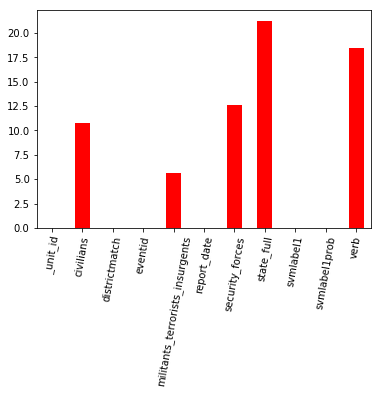

In [6]:
df_all_null.plot(kind="bar",color="red",rot=80)

## Filling missing values

In [7]:
data.to_csv("preprocessed.csv")

In [36]:
# Fill state_full column
print("Filling state_full column...")
data['state_full'].fillna('NA', inplace=False)
print("Filling state_full column...completed")



data = data.dropna(axis = 0, how ='any') 

# Computing null after dropping

In [ ]:
# Compute Null percentage of each feature.
df_all_null = (data.isnull().sum() / data.shape[0]) * 100
#df_all_null = (df_all.isnull().sum())
df_all_null[df_all_null > 0]
df_all_null.plot(kind="bar",color="red",rot=80)

## Data Transformation

In [9]:
data['report_date'] = pd.to_datetime(data.report_date)
#converting into Standard date format Y-M-D
data['report_date'] = pd.to_datetime(data['report_date'], format='%Y-%m-%d')

In [10]:
data['report_date']

0       2000-03-07
1       2000-03-07
2       2000-03-07
3       2000-03-07
4       2000-03-08
5       2000-03-08
6       2000-03-09
7       2000-03-09
8       2000-03-12
9       2000-03-12
10      2000-03-13
11      2000-03-14
12      2000-03-15
13      2000-03-15
14      2000-03-15
15      2000-03-15
16      2000-03-15
17      2000-03-16
18      2000-03-17
19      2000-03-17
20      2000-03-17
21      2000-03-18
22      2000-03-18
23      2000-03-18
24      2000-03-18
25      2000-03-18
26      2000-03-18
27      2000-03-21
28      2000-03-21
29      2000-03-22
           ...    
26970   2009-09-19
26971   2006-05-03
26972   2002-02-19
26973   2006-07-15
26974   2002-01-13
26975   2010-05-13
26976   2010-11-08
26977   2006-09-21
26978   2008-06-14
26979   2000-03-18
26980   2010-01-11
26981   2006-09-10
26982   2011-07-24
26983   2013-04-08
26984   2005-05-25
26985   2000-07-14
26986   2001-05-20
26987   2001-01-16
26988   2010-08-13
26989   2000-11-29
26990   2006-04-11
26991   2008

## Data addition

In [11]:
#adding new columns
data['attack_month'] = data['report_date'].dt.month
data['attack_day'] = data['report_date'].dt.day

In [12]:
data.drop('report_date',axis = 1, inplace = True)

## Data transformation

In [13]:
#replacing similar data of the attribute
replaceVerb=data['verb']
import re

for var in replaceVerb:
    if(re.search("killing",str(var)) or re.search("kill",str(var))):
        var2='killed'
        data['verb'].replace(var,var2,inplace=True)
    elif(re.search("arresting",str(var)) or re.search("arrest",str(var))):
        var2='arrested'
        data['verb'].replace(var,var2,inplace=True)
    elif(re.search("surrender",str(var)) or re.search("surrendering",str(var))):
        var2='surrendered'
        data['verb'].replace(var,var2,inplace=True)
    elif(re.search("injuring",str(var)) or re.search("injure",str(var))):
        var2='injured'
        data['verb'].replace(var,var2,inplace=True)

## One Hot Encoding 

In [14]:
def convert_to_binary(df, column_to_convert):
    categories = list(df[column_to_convert].drop_duplicates())

    for category in categories:
        cat_name = str(category).replace(" ", "_").replace("(", "").replace(")", "").replace("/", "_").replace("-", "").lower()
        col_name = column_to_convert[:4] + '_' + cat_name[:10]
        df[col_name] = 0
        df.loc[(df[column_to_convert] == category), col_name] = 1

    return df

# One Hot Encoding
print("One Hot Encoding categorical data...")
columns_to_convert = ['state_full','svmlabel1','districtmatch']

for column in columns_to_convert:
    data = convert_to_binary(data,column)
    data.drop(column, axis=1, inplace=True)
print("One Hot Encoding categorical data...completed")

One Hot Encoding categorical data...
One Hot Encoding categorical data...completed


In [15]:
#to find total number of deaths based on profession 
security=data['svml_security'].sum()

terrorist=data['svml_terrorist'].sum()

civilian=data['svml_civilian'].sum()

public=data['svml_public'].sum()

private=data['svml_private'].sum()


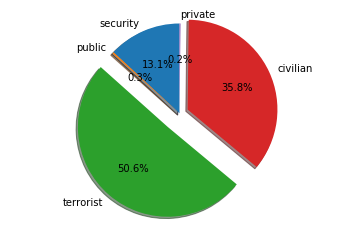

In [16]:
# Pie chart
labels = 'security','public', 'terrorist', 'civilian' ,'private'
sizes = [security,public,terrorist,civilian,private]
explode = (0, 0, 0.2, 0.1, 0)  

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode =explode ,labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')

plt.show()

In [17]:
#from above pie cart we can say that major part of killed were terrorists

## Save Preprocessed Data to csv file

In [18]:
file4 = 'ppppreprocessed.csv'
data.to_csv(file4)

In [39]:
#create data frame for classification

df_all =  pd.DataFrame(data=data)

## Split preprocessed data into train data and test data

In [40]:
df_train = df_all.head(22000)
df_test = df_all.tail(5000)
df_all1 = df_all

In [41]:
#dropping column which we want to predivt from test data
df_test.drop('verb',axis = 1, inplace = True)

/home/shashwat/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [42]:
df_all.drop('verb',axis = 1, inplace = True)

In [43]:
#temporary variables
df_train1 = df_train
df_test1 = df_test
df_all1 = df_all

In [44]:
df_train1.columns

Index(['_unit_id', 'civilians', 'eventid', 'militants_terrorists_insurgents',
       'security_forces', 'svmlabel1prob', 'verb', 'attack_month',
       'attack_day', 'stat_jammu_and_',
       ...
       'dist_parganas_n', 'dist_sheopur', 'dist_dantewara', 'dist_mandsaur',
       'dist_moradabad', 'dist_west_medin', 'dist_sikar', 'dist_almora',
       'dist_datiya', 'dist_gautambudh'],
      dtype='object', length=583)

In [45]:
df_train['verb'].head()

0      killed
1      killed
2    arrested
4      killed
5      killed
Name: verb, dtype: object

In [46]:
df_test1.columns

Index(['_unit_id', 'civilians', 'eventid', 'militants_terrorists_insurgents',
       'security_forces', 'svmlabel1prob', 'attack_month', 'attack_day',
       'stat_jammu_and_', 'stat_nan',
       ...
       'dist_parganas_n', 'dist_sheopur', 'dist_dantewara', 'dist_mandsaur',
       'dist_moradabad', 'dist_west_medin', 'dist_sikar', 'dist_almora',
       'dist_datiya', 'dist_gautambudh'],
      dtype='object', length=582)

In [47]:
df_all.columns

Index(['_unit_id', 'civilians', 'eventid', 'militants_terrorists_insurgents',
       'security_forces', 'svmlabel1prob', 'attack_month', 'attack_day',
       'stat_jammu_and_', 'stat_nan',
       ...
       'dist_parganas_n', 'dist_sheopur', 'dist_dantewara', 'dist_mandsaur',
       'dist_moradabad', 'dist_west_medin', 'dist_sikar', 'dist_almora',
       'dist_datiya', 'dist_gautambudh'],
      dtype='object', length=582)

In [48]:
#seeting _unit_id as a index of dataframe
df_train1.set_index('_unit_id', inplace=True)


## Label Encoding for Categorical data

In [49]:
from sklearn.preprocessing import LabelEncoder

id_train = df_train1.index.values
labels = df_train1['verb']

# Label encoding for the categorical data eg: ...NDF -> 7, US -> 10...
le = LabelEncoder()
y = le.fit_transform(labels)
X = df_train1.drop('verb', axis=1, inplace=False)

In [50]:
X.shape

(18737, 581)

In [51]:
X.head()

,civilians,eventid,militants_terrorists_insurgents,security_forces,svmlabel1prob,attack_month,attack_day,stat_jammu_and_,stat_nan,stat_assam,...,dist_parganas_n,dist_sheopur,dist_dantewara,dist_mandsaur,dist_moradabad,dist_west_medin,dist_sikar,dist_almora,dist_datiya,dist_gautambudh
_unit_id,,,,,,,,,,,,,,,,,,,,,
711601341,0.0,3,3.0,1.0,0.997059,3,7,1,0,0,...,0,0,0,0,0,0,0,0,0,0
711601342,0.0,4,7.0,0.0,0.979219,3,7,1,0,0,...,0,0,0,0,0,0,0,0,0,0
711601343,0.0,13,1.0,0.0,0.948564,3,7,0,0,0,...,0,0,0,0,0,0,0,0,0,0
711601345,0.0,41,2.0,0.0,0.858030,3,8,0,0,0,...,0,0,0,0,0,0,0,0,0,0
711601346,0.0,46,1.0,0.0,0.522630,3,8,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [52]:
from sklearn import cross_validation
## Spliting of training dataset into 70% training data and 30% testing data randomly
features_train, features_test, labels_train, labels_test = cross_validation.train_test_split(X, y, test_size=0.3, random_state=42)

# Gradient Boosting

In [69]:
## Decision Tree 
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier()
clf.fit(features_train, labels_train)
prediction = clf.predict(features_test)
accuracy = accuracy_score(labels_test , prediction)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 66.47%


## Decission tree Classifier

In [65]:
## Decision Tree 
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf.fit(features_train, labels_train)
prediction = clf.predict(features_test)
accuracy = accuracy_score(labels_test , prediction)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 59.20%


## Gaussian Naive Bayes Classifier

In [66]:
## Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(features_train, labels_train)
prediction = clf.predict(features_test)
## Computing accuracy
accuracy = accuracy_score(labels_test , prediction)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 37.14%


## SVM Classifier

In [67]:
## SVM 
from sklearn import svm
clf = svm.SVC(kernel="rbf") 
clf.fit(features_train, labels_train)
prediction = clf.predict(features_test)
## Computing accuracy
accuracy = accuracy_score(labels_test , prediction)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 53.33%


# RandomForest classifier

In [68]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(features_train, labels_train)
prediction = clf.predict(features_test)
## Computing accuracy
accuracy = accuracy_score(labels_test , prediction)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 64.91%


# Logistic Regression

In [70]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(features_train, labels_train)
prediction = clf.predict(features_test)
## Computing accuracy
accuracy = accuracy_score(labels_test , prediction)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 58.18%


# K Nearest Neighbours

In [72]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier()
clf.fit(features_train, labels_train)
prediction = clf.predict(features_test)
## Computing accuracy
accuracy = accuracy_score(labels_test , prediction)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 47.83%


# Bagging Classifier

In [71]:
from sklearn.ensemble import BaggingClassifier
clf = BaggingClassifier()
clf.fit(features_train, labels_train)
prediction = clf.predict(features_test)
## Computing accuracy
accuracy = accuracy_score(labels_test , prediction)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 64.66%


# Extra Trees Classifier

In [73]:
from sklearn.ensemble import ExtraTreesClassifier
clf = ExtraTreesClassifier()
clf.fit(features_train, labels_train)
prediction = clf.predict(features_test)
## Computing accuracy
accuracy = accuracy_score(labels_test , prediction)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 62.86%


# Approach 2

## All At once

In [ ]:
from sklearn.ensemble import *
from sklearn.neighbors import *
from sklearn.svm import *
from sklearn.dummy import *
from sklearn.tree import *
from sklearn.gaussian_process import *

ensembles = [
    AdaBoostClassifier(),
    BaggingClassifier(),
    ExtraTreesClassifier(),
    GradientBoostingClassifier(),
    IsolationForest(),
    RandomForestClassifier()
]

neighbors = [
    KNeighborsClassifier(),
    RadiusNeighborsClassifier(),
    NearestCentroid()
]

svms = [
    LinearSVC(),
    NuSVC(),
    SVC(),
]

trees = [
    DecisionTreeClassifier(),
    ExtraTreeClassifier(),
]

extraa = [
    DummyClassifier(),
    GaussianProcessClassifier()
]

models = []
models.extend(ensembles)
models.extend(neighbors)
models.extend(svms)
models.extend(trees)
models.extend(extraa)
for model in models:
    try:
        print("---------------------------------------------------------------")
        print(model)
        print("---------------------------------------------------------------")
        model.fit(features_train, labels_train)
        prediction = model.predict(features_test)
        ## Computing accuracy
        accuracy = accuracy_score(labels_test , prediction)
        print("Accuracy: %.2f%%\n\n\n\n\n\n" % (accuracy * 100.0))
    except:
        print("\n\nerror in")
        print(model)

---------------------------------------------------------------
AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None)
---------------------------------------------------------------
Accuracy: 58.34%






---------------------------------------------------------------
BaggingClassifier(base_estimator=None, bootstrap=True,
         bootstrap_features=False, max_features=1.0, max_samples=1.0,
         n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
         verbose=0, warm_start=False)
---------------------------------------------------------------
Accuracy: 65.81%






---------------------------------------------------------------
ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min

/home/shashwat/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Accuracy: 11.38%






---------------------------------------------------------------
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
---------------------------------------------------------------
Accuracy: 64.75%






---------------------------------------------------------------
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')
---------------------------------------------------------------
Accuracy: 47.83%






---------------------------------------------------------------
RadiusNeighborsClassifier(